In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AcademicPerformance_New.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll No      98 non-null     float64
 1   NationalITy  98 non-null     object 
 2   WT           91 non-null     float64
 3   DSBDA        95 non-null     float64
 4   AI           89 non-null     float64
 5   Average      98 non-null     float64
 6   Grade        98 non-null     object 
 7   PG           98 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.3+ KB


In [4]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [5]:
df = pd.read_csv("AcademicPerformance_New.csv")
print("Initial Dataset Shape:", df.shape)
print("\nMissing Values Before Cleaning:\n", df.isnull().sum())

Initial Dataset Shape: (99, 8)

Missing Values Before Cleaning:
 Roll No         1
NationalITy     1
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              1
dtype: int64


In [6]:
# Step 1: Handle Missing Values
# Fill missing values for numeric columns using mean
numeric_cols = ['Roll No', 'WT', 'DSBDA', 'AI', 'Average']
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.mean()))
# Fill missing values for categorical columns using mode
categorical_cols = ['NationalITy', 'Grade', 'PG']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
print("\nMissing Values After Cleaning:\n", df.isnull().sum())


Missing Values After Cleaning:
 Roll No        0
NationalITy    0
WT             0
DSBDA          0
AI             0
Average        0
Grade          0
PG             0
dtype: int64


In [7]:

# Step 2: Detect and Show Outliers (Z-Score)
z_scores = np.abs(zscore(df[numeric_cols]))
outlier_rows = (z_scores > 3).any(axis=1)
outliers = df[outlier_rows]

print(f"\nNumber of Outliers Detected: {outliers.shape[0]}")
print("Outlier Rows:\n", outliers)


Number of Outliers Detected: 1
Outlier Rows:
     Roll No NationalITy    WT  DSBDA    AI  Average Grade   PG
17     18.0      Rassia  18.0   32.0  28.0     26.0     D  Yes


In [8]:
# Step 3: Remove Outliers
df_cleaned = df[~outlier_rows].copy()
print("\nDataset Shape After Removing Outliers:", df_cleaned.shape)


Dataset Shape After Removing Outliers: (98, 8)


In [9]:
# Step 4: Binning with Labels
bins = [0, 50, 70, 100]
labels = ['Low', 'Medium', 'High']
df_cleaned['Performance_Level'] = pd.cut(df_cleaned['Average'], bins=bins, labels=labels, include_lowest=True)

print("\nPerformance Level Distribution:\n", df_cleaned['Performance_Level'].value_counts())


Performance Level Distribution:
 Performance_Level
Medium    37
Low       31
High      30
Name: count, dtype: int64


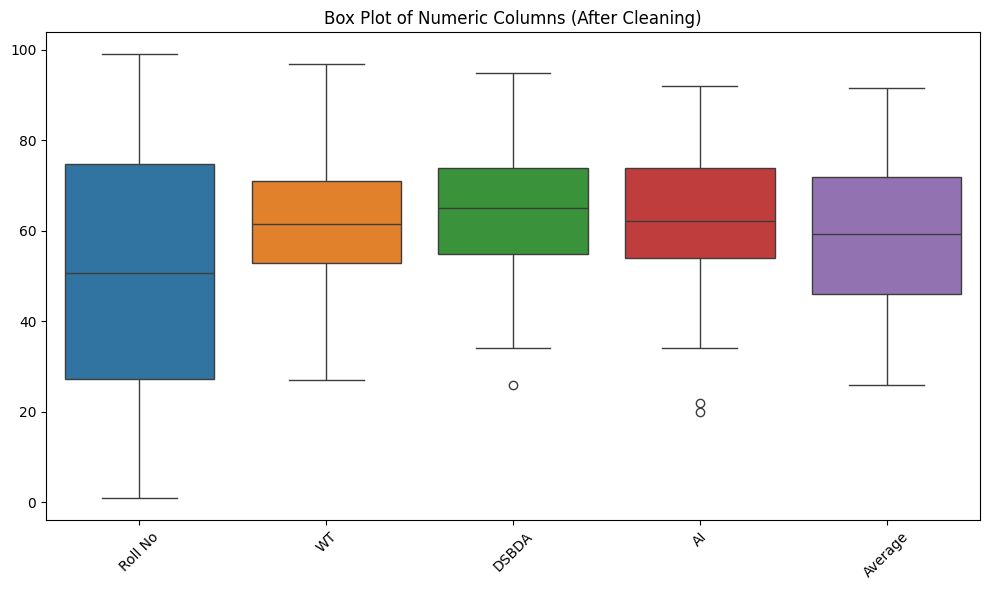

In [10]:
# Step 5: Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[numeric_cols])
plt.title("Box Plot of Numeric Columns (After Cleaning)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()